In [ ]:
# Date 5 Apr 24.
# Notes & Lecture by Mr Akhona Njeje.
# Problem : Calculating a magnetic feild of a chanrged wire.

# Theory:

# We need to employ Maxwell equations of magnetostatics(integral form), you can derive the potential density distribution j(r).
# Magnetic feild is given by B(r) = Grad x A(r).
# A(r) = u_0/4pi (integral of [j(r)/|r - r'|]dV'). ---> Triple integrals.
# We dive deep into Electrodynamics.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mu0 = 1

# straight wire.
j0 = 1   # Ampere / meter^2.
r0 = 0.001   # m.
l0 = 1000   # m.

In [ ]:
# Lets prepare arrays + formulas with if statements.
# We want to intergrate with respect to z-axis.

def j(r):
  return np.array([0.0, 0.0, j0])

j(np.array([0, 0, 5]))

array([0., 0., 1.])

In [ ]:
# Coordinates.

coordMax = 4.9
numpoints = 50

coords = np.array(np.meshgrid(np.linspace(-coordMax, coordMax, numpoints),
                              np.linspace(-coordMax, coordMax, numpoints),
                              np.zeros(1),
                              indexing = 'ij'
                              ))
print(coords[:,numpoints//2-1, numpoints//2,0])
print(coords[:,numpoints//2, numpoints//2,0])

[-0.1  0.1  0. ]
[0.1 0.1 0. ]


In [ ]:
# Vector potential.

A = np.array(np.meshgrid(np.zeros(numpoints),
                         np.zeros(numpoints),
                         np.zeros(1),
                         indexing = 'ij'
                         ))
print(A[:,numpoints//2-1, numpoints//2,0])
print(A[:,numpoints//2, numpoints//2,0])

[0. 0. 0.]
[0. 0. 0.]


In [ ]:
# We can now calculate the integrals of the vector potential.
# We need a number for the integration steps.

numint = 5001
d = 2*coordMax / (numpoints -1)

for ix in np.arange(numpoints):
  for iy in np.arange(numpoints):
    r = np.array([-coordMax+ix*d, -coordMax+iy*d, 0.0])
    for zj in np.linspace(-l0, l0, numint):
      rj = np.array([0.0, 0.0, zj])
      A[:, ix, iy, 0] = A[:,ix, iy, 0] + j(rj) / np.sqrt(r[0]**2 + r[1]**2 + rj[2]**2)

In [ ]:
dz = (2*10)/(numint - 1)
df = np.pi * r0**2
A = A * mu0 / (4*np.pi) * df * dz

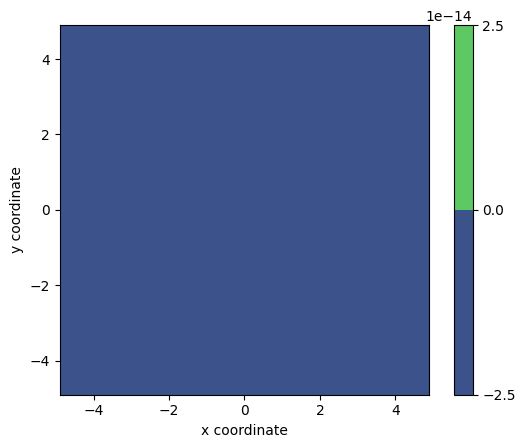

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.contourf(coords[0,:,:,0], coords[1,:,:,0], A[0,:,:,0])
plt.colorbar()

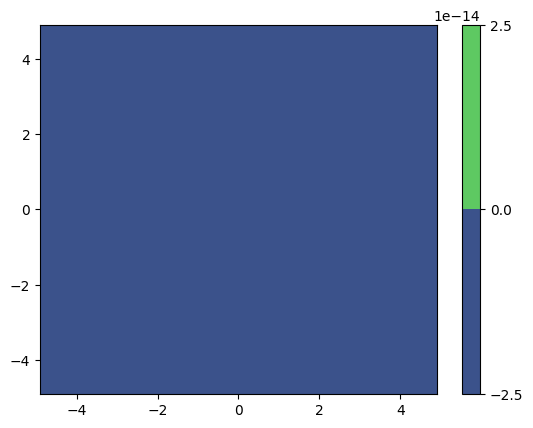

In [ ]:
plt.contourf(coords[0,:,:,0], coords[1,:,:,0], A[1,:,:,0])
plt.colorbar()

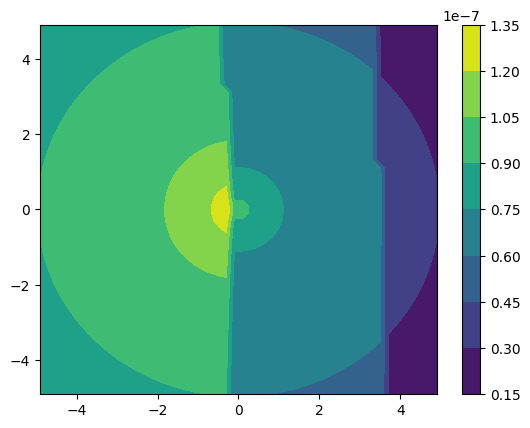

In [ ]:
plt.contourf(coords[0,:,:,0], coords[1,:,:,0], A[2,:,:,0])
plt.colorbar()

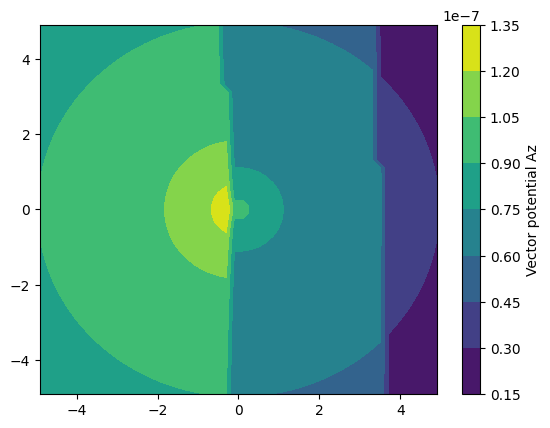

In [ ]:
plt.contourf(coords[0,:,:,0], coords[1,:,:,0], A[2,:,:,0])
cbar = plt.colorbar()
cbar.set_label('Vector potential Az')

ValueError: x and y must be the same size

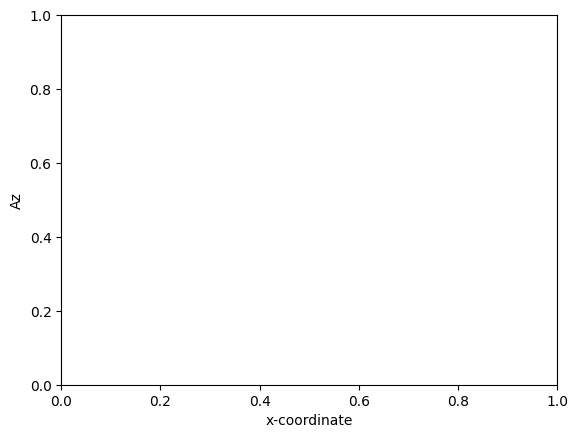

In [ ]:
plt.xlabel('x-coordinate')
plt.ylabel('Az')

plt.scatter(coords[0,:numpoints//2,0], A[2,:,numpoints//2,0])

xlist = np.linspace(-coordinateMax, coordinateMax, 10001)
plt.plot(xlist,
         mu0/(2*np.pi)*jo*df*np.log(2*l0/np.sqrt(xlist**2 + coords[1,0,numpoints//2,0]**2)),'red')

In [ ]:
# Create empty array for magnetic feild.

B = np.array(np.meshgrid(np.zeros(numpoints),
                         np.zeros(numpoints),
                         np.zeros(1),
                         indexing = 'ij'))

In [ ]:
# We create A FORMULAR for B(r), interms of the derivatives.

B[0,1:-1,1:-1,0] = (A[2,1:-1,2:,0] - A[2,1:-1,:2,0]) / (2*d)
B[0,1:-1,1:-1,0] = (A[2,2:,1:-1,0] - A[2,:-2,1:-1,0]) / (2*d)
B[0,1:-1,1:-1,0] = (A[1,2:,1:-1,0] - A[2,1:-1,2:,0]) / (2*d) -(A[0,1:-1,2:,0] - A[0,1:-1,:-2,0]) / (2*d)

ValueError: operands could not be broadcast together with shapes (48,48) (48,2) 